In [63]:
%load_ext autoreload
%autoreload 2

#%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Rotation curves

First, imports:

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os
import astropy.units as u
from astropy.constants import G

import snapshot_obj 
import curve_fit

import importlib

In [111]:
importlib.reload(snapshot_obj)
importlib.reload(curve_fit)

<module 'curve_fit' from '/home/kassiili/Curvaton_Simulations/analysis/curve_fit.py'>

## Get data

In [112]:
# Which halo:
gn = 10; sgn = 0

# Ones that seem alright: 12,0;

# Get LCDM data:
LCDM = snapshot_obj.Snapshot("CDM_V1_LR",127)

In [113]:
# Read halo:
fnum = LCDM.file_of_halo(gn,sgn)
SGNs = LCDM.get_subhalos("SubGroupNumber",fnums=[fnum])
GNs = LCDM.get_subhalos("GroupNumber",fnums=[fnum])

vmax = LCDM.get_subhalos("Vmax",fnums=[fnum]) / 100000 
                                                    # cm/s to km/s 
rmax = LCDM.get_subhalos("VmaxRadius",fnums=[fnum]) \
            * u.cm.to(u.kpc)
COP = LCDM.get_subhalos("CentreOfPotential",fnums=[fnum]) \
            * u.cm.to(u.kpc)

print(np.mean(rmax))
print(np.median(rmax))
print(np.min(rmax),np.max(rmax))
print(rmax.size)
print(np.sum(rmax>20))

# Select halo:
halo_mask = np.logical_and(SGNs == sgn,GNs == gn)
print(halo_mask)
vmax = vmax[halo_mask]
rmax = rmax[halo_mask]
COP = COP[halo_mask]
print(rmax)

8.946739067510578
9.553619059222921
1.288558791190573 18.44466220874996
16
0
[False False False False False False  True False False False False False
 False False False False]
[13.0026566]


In [114]:
# V1kpc:
SGNs = LCDM.get_subhalos("SubGroupNumber")
GNs = LCDM.get_subhalos( "GroupNumber")
halo_mask = np.logical_and(SGNs == sgn,GNs == gn)
v1kpc = LCDM.get_subhalos("V1kpc") 
v1kpc = v1kpc[halo_mask]

In [115]:
r = {}
v_circ = {}
#pts = {'gas' : [0], 'dm' : [1], 'dm+' : [2,3], 'stars' : [4], 'BHs' : [5], 'all' : [0,1,4,5]}
#pts = {'dm1': [1], 'dm2': [2], 'dm3': [3]}
pts = {'all' : [0,1,4,5], 'dm' : [1], 'allbutdm' : [0,4,5]}
masks = {'all' : [], 'dm' : [], 'allbutdm' : []}
# Read particles:
for key,pt in pts.items():
    SGNs = LCDM.get_particles("SubGroupNumber",part_type=pt)
    GNs = LCDM.get_particles("GroupNumber",part_type=pt)
    coords = LCDM.get_particles("Coordinates",part_type=pt) * u.cm.to(u.kpc)
    mass = LCDM.get_particle_masses(part_type=pt) * u.g.to(u.Msun)
    
    # Select halo:
    halo_mask = np.logical_and(SGNs == sgn,GNs == gn)
    masks[key] = halo_mask
    print(np.sum(halo_mask))
    coords = coords[halo_mask]
    print(np.sum(mass))
    mass = mass[halo_mask]
    print(np.bincount(int(mass)))
    print(np.sum(mass))
    
    # Periodic wrap coordinates around centre.
    with h5py.File(LCDM.part_file,'r') as partf:
        h = partf['link1/Header'].attrs.get('HubbleParam')
        boxs = partf['link1/Header'].attrs.get('BoxSize') * 1000/h 
                                                        # Mpc/h -> kpc
    coords = np.mod(coords-COP+0.5*boxs, boxs) + COP-0.5*boxs

    # Calculate distance to centre and sort:
    d = np.linalg.norm(coords - COP, axis=1)
    sorting = np.argsort(d)
    d = d[sorting]
    
    cumass = np.cumsum(mass[sorting])
    
    # Begin rotation curve from the 10th particle to reduce noise at the low end of the curve.include only every 10th particle for cleaner curves.
    mask = d>0; d=d[mask]; cumass=cumass[mask]
#    jump = 20
#    #r = r[jump::jump]
#    #cumass = cumass[jump::jump]
#    d = d[jump:]
#    cumass = cumass[jump:]
    
    # Compute velocity.
    myG = G.to(u.km**2 * u.kpc * u.Msun**-1 * u.s**-2).value
    v_circ[key] = cumass #np.sqrt((myG * cumass) / d)
    r[key] = d


0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
1
4
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
here, dm1 part n = 1759284
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6620
15486772013743.596


TypeError: only size-1 arrays can be converted to Python scalars

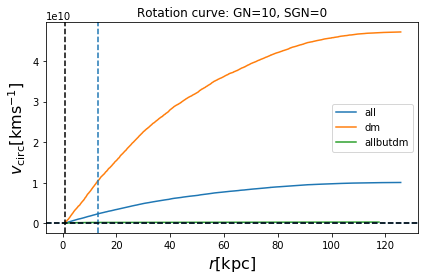

In [107]:
fig, axes = plt.subplots()

# Set axes:
#axes.set_xscale('log')
#axes.set_yscale('log')
#axes.set_xlim(0,80)
#axes.set_ylim(y_down,y_up)

# Set labels:
axes.set_xlabel('$r[\mathrm{kpc}]$', fontsize=16)
axes.set_ylabel('$v_{\mathrm{circ}}[\mathrm{kms^{-1}}]$', fontsize=16)

# Galaxy text:
axes.set_title('Rotation curve: GN={}, SGN={}'.format(gn,sgn))

for key in pts.keys():
    axes.plot(r[key], v_circ[key], label=key)
axes.axhline(vmax,linestyle='dashed')
axes.axvline(rmax,linestyle='dashed')
axes.axhline(v1kpc,linestyle='dashed',c='black')
axes.axvline(1,linestyle='dashed',c='black')
    
plt.legend()
plt.tight_layout()


# Save figure:
#
#filename = 'cumulDistByVmax_evol_{}.png'.format(galaxy)
#
#home = os.path.dirname(snapshot_obj.__file__)
#path = os.path.join(home,"Figures")
#
## If the directory does not exist, create it
#if not os.path.exists(path):
#    os.makedirs(path)
#plt.savefig(os.path.join(path,filename), dpi=200)